In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [26]:
df = pd.read_csv(r"C:\Users\Codex_Jay\Desktop\Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [28]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


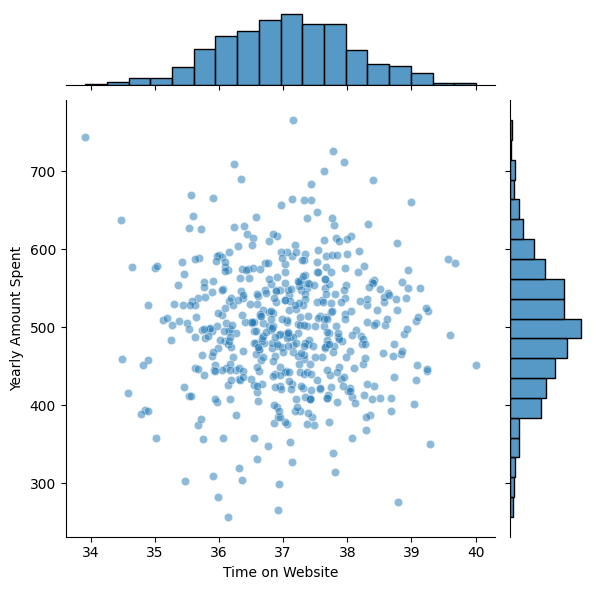

In [21]:
# EDA
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data= df, alpha = 0.5);

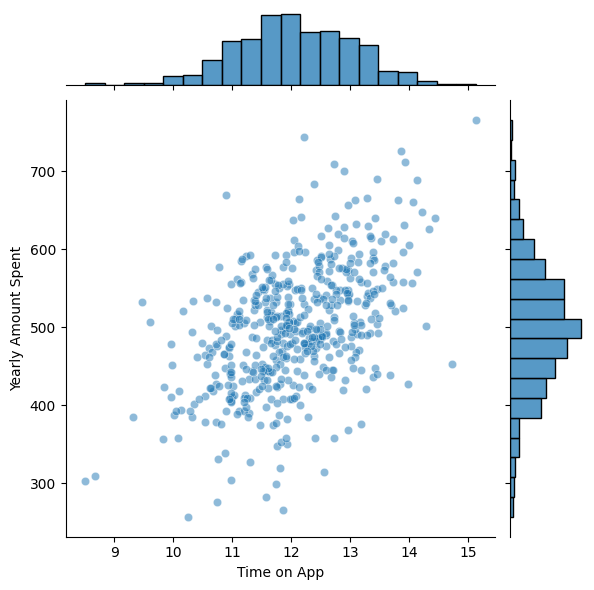

In [22]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data= df, alpha = 0.5);

C:\Users\Codex_Jay\AppData\Local\Temp\ipykernel_864\1113624997.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent', 'Length of Membership']],


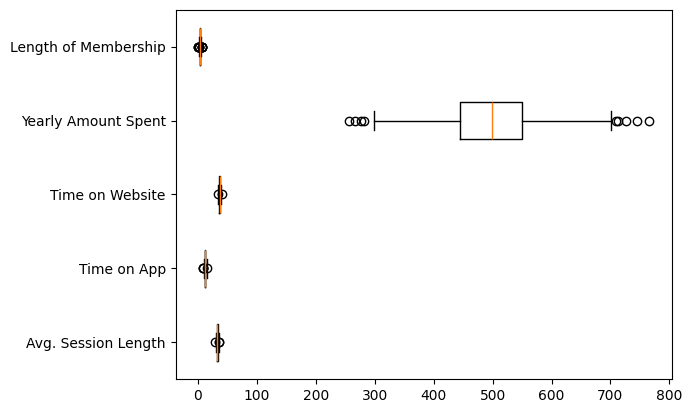

In [104]:
#Outliers check
plt.boxplot(df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent', 'Length of Membership']], 
            labels = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Yearly Amount Spent', 'Length of Membership'],
            vert = False);


In [81]:
#Correlation Metrics
p_corr1 = df['Time on App'].corr(df['Yearly Amount Spent'])
p_corr2 = df['Time on Website'].corr(df['Yearly Amount Spent'])
p_corr3 = df['Avg. Session Length'].corr(df['Yearly Amount Spent'])
p_corr4 = df['Length of Membership'].corr(df['Yearly Amount Spent'])

print(f'Pearson Correlation between Time on App vs Yearly Amount Spent: {p_corr1}')
print(f'Pearson Correlation between Time on Website vs Yearly Amount Spent: {p_corr2}')
print(f'Pearson Correlation between Avg. Session Length vs Yearly Amount Spent: {p_corr3}')
print(f'Pearson Correlation between Length of Membership vs Yearly Amount Spent: {p_corr4}')

Pearson Correlation between Time on App vs Yearly Amount Spent: 0.49932777005345047
Pearson Correlation between Time on Website vs Yearly Amount Spent: -0.0026408446721589386
Pearson Correlation between Avg. Session Length vs Yearly Amount Spent: 0.35508829470764314
Pearson Correlation between Length of Membership vs Yearly Amount Spent: 0.8090835682475811


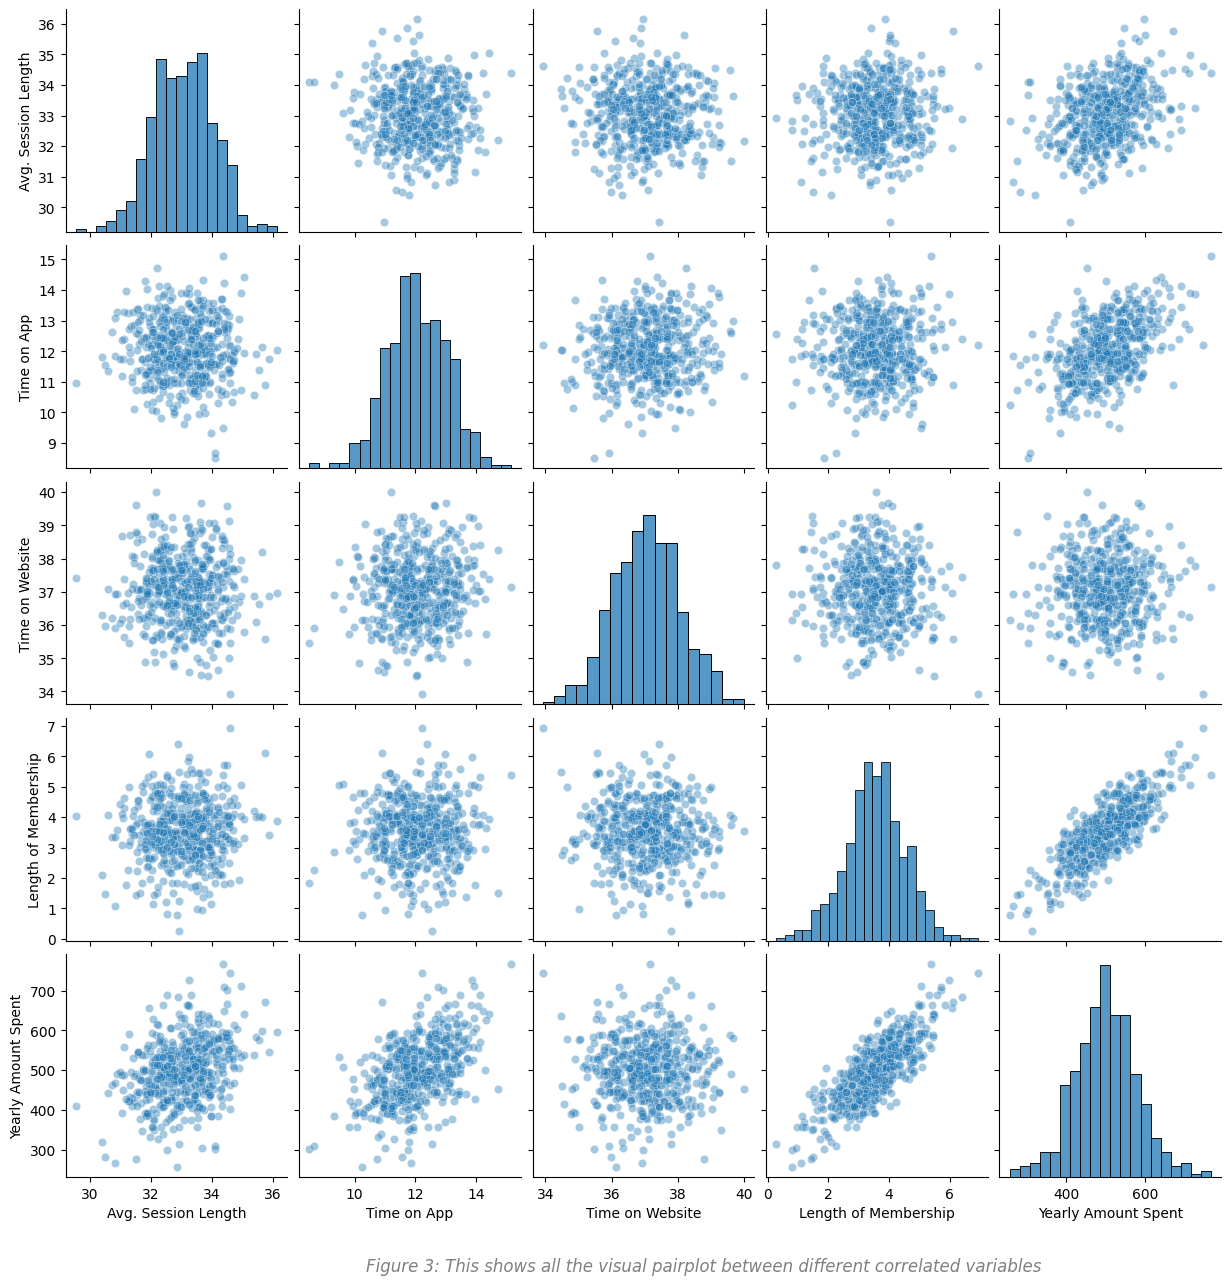

In [107]:
sns.pairplot(df, kind= 'scatter', plot_kws = {'alpha': 0.4}, markers = 'o')
plt.figtext(0.3, -0.025, 'Figure 3: This shows all the visual pairplot between different correlated variables', 
            fontsize = '12',fontstyle = 'italic', color = 'grey', wrap = True
            );

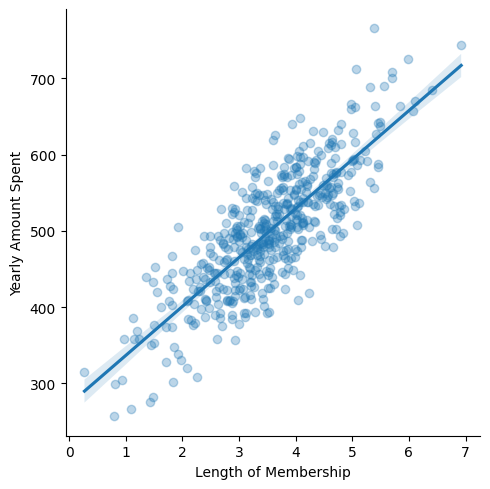

In [24]:
#Linear_Model Plot
sns.lmplot(x = 'Length of Membership',
            y = 'Yearly Amount Spent',
            data = df,
            scatter_kws={'alpha': 0.3})

In [35]:
#Scikit - learn
#Split dataset into training and testing
#Train 70% of data and test with 30% of data

x = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']] # Predictors
y = df['Yearly Amount Spent'] # Targets


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [46]:
#Model initialization
lm = LinearRegression()

In [47]:
lm.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [51]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns =['coeff'])
cdf

,coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [57]:
# Predictions
predictions = lm.predict(x_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of LM Model')

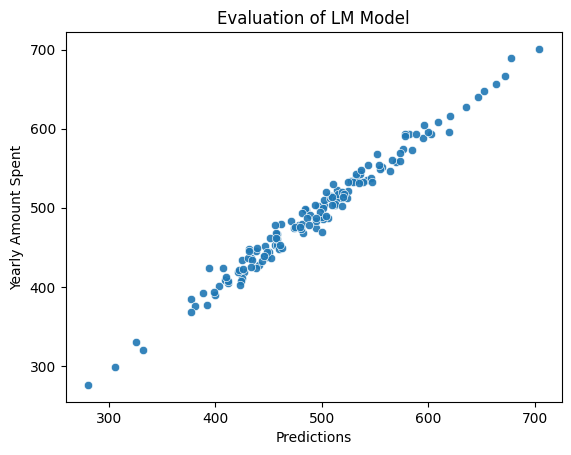

In [79]:
sns.scatterplot(x = predictions, y = y_test, alpha = 0.9)
plt.xlabel('Predictions')
plt.title('Evaluation of LM Model')

In [65]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predictions)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')
print(f'Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, predictions))}')

Mean Absolute Error: 8.426091641432116
Mean Squared Error: 103.91554136503333
Root Mean Squared Error: 10.193897260863155


In [67]:
#Analysis of Residuals
Residuals = y_test - predictions
Residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

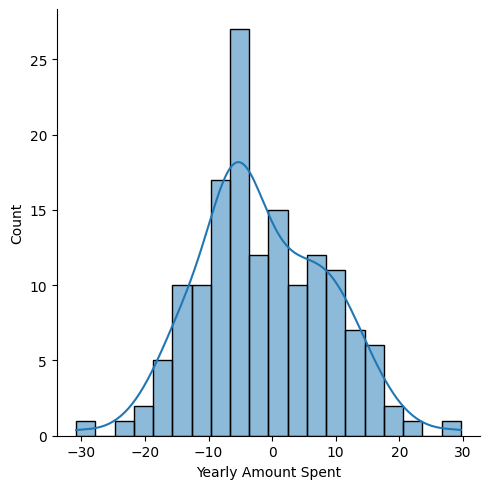

In [71]:
sns.displot(Residuals, bins = 20, kde = True)

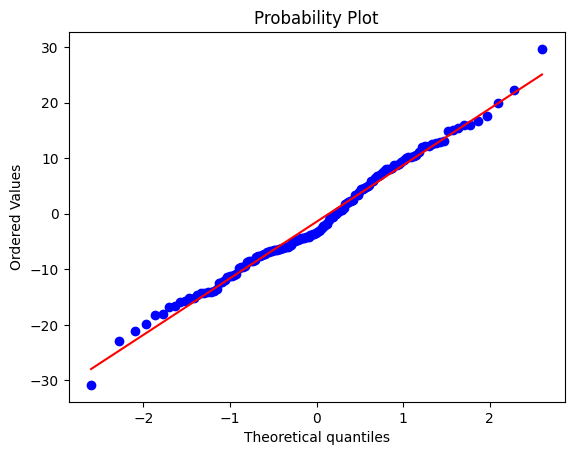

In [74]:
stats.probplot(Residuals, dist = 'norm', plot = pylab)
pylab.show()